<a href="https://colab.research.google.com/github/milkadata/Classification-Model-2023/blob/main/RESUBMISSION_Week_9_Assigment_3_College_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#GOAL: 
1.  To predict a college's acceptance rate using different features
2. Get insights on diversity data of schools

In [14]:
## Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
# Pandas
import pandas as pd
# Numpy
import numpy as np
# MatplotLib
import matplotlib.pyplot as plt


In [16]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2. Week 8/DATA/COLLEGE ACCEPTANCE.csv')
df


,Name,Applicants total,Admissions total,Enrolled total,Percent of freshmen submitting SAT scores,Percent of freshmen submitting ACT scores,SAT Critical Reading 25th percentile score,SAT Critical Reading 75th percentile score,SAT Math 25th percentile score,SAT Math 75th percentile score,...,Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
0,Alabama A & M University,6142.0,5521.0,1104.0,15.0,88.0,370.0,450.0,350.0,450.0,...,81.0,81.0,7.0,1.0,32.0,89.0,89.0,1.0,NaN,NaN
1,University of Alabama at Birmingham,5689.0,4934.0,1773.0,6.0,93.0,520.0,640.0,520.0,650.0,...,36.0,36.0,10.0,0.0,60.0,56.0,55.0,5.0,24136.0,NaN
2,Amridge University,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90.0,90.0,0.0,40.0,90.0,100.0,100.0,0.0,NaN,302.0
3,University of Alabama in Huntsville,2054.0,1656.0,651.0,34.0,94.0,510.0,640.0,510.0,650.0,...,31.0,31.0,4.0,1.0,63.0,46.0,46.0,3.0,11502.0,NaN
4,Alabama State University,10245.0,5251.0,1479.0,18.0,87.0,380.0,480.0,370.0,480.0,...,76.0,76.0,13.0,11.0,34.0,81.0,81.0,0.0,13202.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,University of South Florida-Sarasota-Manatee,393.0,136.0,86.0,79.0,59.0,502.0,580.0,490.0,570.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4422.0,NaN
1530,The Kingâ€™s College,3033.0,2158.0,127.0,57.0,45.0,540.0,630.0,510.0,600.0,...,34.0,34.0,10.0,4.0,100.0,57.0,56.0,12.0,NaN,935.0
1531,Ottawa University-Online,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20863.0
1532,Providence Christian College,122.0,65.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,...,50.0,50.0,14.0,0.0,100.0,64.0,64.0,14.0,NaN,350.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Columns: 108 entries, Name to Endowment assets (year end) per FTE enrollment (FASB)
dtypes: float64(97), object(11)
memory usage: 1.3+ MB


In [18]:
column_names = df.columns.tolist()
column_names

['Name',
 'Applicants total',
 'Admissions total',
 'Enrolled total',
 'Percent of freshmen submitting SAT scores',
 'Percent of freshmen submitting ACT scores',
 'SAT Critical Reading 25th percentile score',
 'SAT Critical Reading 75th percentile score',
 'SAT Math 25th percentile score',
 'SAT Math 75th percentile score',
 'SAT Writing 25th percentile score',
 'SAT Writing 75th percentile score',
 'ACT Composite 25th percentile score',
 'ACT Composite 75th percentile score',
 'Estimated enrollment, total',
 'Estimated enrollment, full time',
 'Estimated enrollment, part time',
 'Estimated undergraduate enrollment, total',
 'Estimated undergraduate enrollment, full time',
 'Estimated undergraduate enrollment, part time',
 'Estimated freshman undergraduate enrollment, total',
 'Estimated freshman enrollment, full time',
 'Estimated freshman enrollment, part time',
 'Estimated graduate enrollment, total',
 'Estimated graduate enrollment, full time',
 'Estimated graduate enrollment, part

#FEATURE ENGINEERING

In [19]:
df['TotalSAT75'] = df['SAT Critical Reading 75th percentile score'] + df['SAT Math 75th percentile score'] 
df['TotalSAT25'] = df['SAT Critical Reading 25th percentile score'] + df['SAT Math 25th percentile score']  
df.head()

,Name,Applicants total,Admissions total,Enrolled total,Percent of freshmen submitting SAT scores,Percent of freshmen submitting ACT scores,SAT Critical Reading 25th percentile score,SAT Critical Reading 75th percentile score,SAT Math 25th percentile score,SAT Math 75th percentile score,...,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB),TotalSAT75,TotalSAT25
0,Alabama A & M University,6142.0,5521.0,1104.0,15.0,88.0,370.0,450.0,350.0,450.0,...,7.0,1.0,32.0,89.0,89.0,1.0,NaN,NaN,900.0,720.0
1,University of Alabama at Birmingham,5689.0,4934.0,1773.0,6.0,93.0,520.0,640.0,520.0,650.0,...,10.0,0.0,60.0,56.0,55.0,5.0,24136.0,NaN,1290.0,1040.0
2,Amridge University,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,40.0,90.0,100.0,100.0,0.0,NaN,302.0,NaN,NaN
3,University of Alabama in Huntsville,2054.0,1656.0,651.0,34.0,94.0,510.0,640.0,510.0,650.0,...,4.0,1.0,63.0,46.0,46.0,3.0,11502.0,NaN,1290.0,1020.0
4,Alabama State University,10245.0,5251.0,1479.0,18.0,87.0,380.0,480.0,370.0,480.0,...,13.0,11.0,34.0,81.0,81.0,0.0,13202.0,NaN,960.0,750.0


In [20]:
# I want the target to guess the acceptance rate of a college using the features. To do that, we had to create a acceptance % column
df['Acceptance'] = (df['Admissions total'] /df['Applicants total']) .round(2)
df.head()

,Name,Applicants total,Admissions total,Enrolled total,Percent of freshmen submitting SAT scores,Percent of freshmen submitting ACT scores,SAT Critical Reading 25th percentile score,SAT Critical Reading 75th percentile score,SAT Math 25th percentile score,SAT Math 75th percentile score,...,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB),TotalSAT75,TotalSAT25,Acceptance
0,Alabama A & M University,6142.0,5521.0,1104.0,15.0,88.0,370.0,450.0,350.0,450.0,...,1.0,32.0,89.0,89.0,1.0,NaN,NaN,900.0,720.0,0.90
1,University of Alabama at Birmingham,5689.0,4934.0,1773.0,6.0,93.0,520.0,640.0,520.0,650.0,...,0.0,60.0,56.0,55.0,5.0,24136.0,NaN,1290.0,1040.0,0.87
2,Amridge University,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40.0,90.0,100.0,100.0,0.0,NaN,302.0,NaN,NaN,NaN
3,University of Alabama in Huntsville,2054.0,1656.0,651.0,34.0,94.0,510.0,640.0,510.0,650.0,...,1.0,63.0,46.0,46.0,3.0,11502.0,NaN,1290.0,1020.0,0.81
4,Alabama State University,10245.0,5251.0,1479.0,18.0,87.0,380.0,480.0,370.0,480.0,...,11.0,34.0,81.0,81.0,0.0,13202.0,NaN,960.0,750.0,0.51


In [21]:
# Schools yield rate is the total of students that actually accepted the offered vs the total admitted
#A high yield rate is expected at good schools
df['Yield Rate'] = (df['Enrolled total'] /df['Admissions total']).round(2)
df.head()

,Name,Applicants total,Admissions total,Enrolled total,Percent of freshmen submitting SAT scores,Percent of freshmen submitting ACT scores,SAT Critical Reading 25th percentile score,SAT Critical Reading 75th percentile score,SAT Math 25th percentile score,SAT Math 75th percentile score,...,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB),TotalSAT75,TotalSAT25,Acceptance,Yield Rate
0,Alabama A & M University,6142.0,5521.0,1104.0,15.0,88.0,370.0,450.0,350.0,450.0,...,32.0,89.0,89.0,1.0,NaN,NaN,900.0,720.0,0.90,0.20
1,University of Alabama at Birmingham,5689.0,4934.0,1773.0,6.0,93.0,520.0,640.0,520.0,650.0,...,60.0,56.0,55.0,5.0,24136.0,NaN,1290.0,1040.0,0.87,0.36
2,Amridge University,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90.0,100.0,100.0,0.0,NaN,302.0,NaN,NaN,NaN,NaN
3,University of Alabama in Huntsville,2054.0,1656.0,651.0,34.0,94.0,510.0,640.0,510.0,650.0,...,63.0,46.0,46.0,3.0,11502.0,NaN,1290.0,1020.0,0.81,0.39
4,Alabama State University,10245.0,5251.0,1479.0,18.0,87.0,380.0,480.0,370.0,480.0,...,34.0,81.0,81.0,0.0,13202.0,NaN,960.0,750.0,0.51,0.28


In [22]:
# Get the unique state types
df['State abbreviation'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [23]:
region_mapping = {
    'Alabama': 'South',
    'Alaska': 'West',
    'Arizona': 'West',
    'Arkansas': 'South',
    'California': 'West',
    'Colorado': 'West',
    'Connecticut': 'Northeast',
    'Delaware': 'Northeast',
    'District of Columbia': 'Northeast',
    'Florida': 'South',
    'Georgia': 'South',
    'Hawaii': 'West',
    'Idaho': 'West',
    'Illinois': 'Midwest',
    'Indiana': 'Midwest',
    'Iowa': 'Midwest',
    'Kansas': 'Midwest',
    'Kentucky': 'South',
    'Louisiana': 'South',
    'Maine': 'Northeast',
    'Maryland': 'Northeast',
    'Massachusetts': 'Northeast',
    'Michigan': 'Midwest',
    'Minnesota': 'Midwest',
    'Mississippi': 'South',
    'Missouri': 'Midwest',
    'Montana': 'West',
    'Nebraska': 'Midwest',
    'Nevada': 'West',
    'New Hampshire': 'Northeast',
    'New Jersey': 'Northeast',
    'New Mexico': 'West',
    'New York': 'Northeast',
    'North Carolina': 'South',
    'North Dakota': 'Midwest',
    'Ohio': 'Midwest',
    'Oklahoma': 'South',
    'Oregon': 'West',
    'Pennsylvania': 'Northeast',
    'Rhode Island': 'Northeast',
    'South Carolina': 'South',
    'South Dakota': 'Midwest',
    'Tennessee': 'South',
    'Texas': 'South',
    'Utah': 'West',
    'Vermont': 'Northeast',
    'Virginia': 'South',
    'Washington': 'West',
    'West Virginia': 'South',
    'Wisconsin': 'Midwest',
    'Wyoming': 'West'
}

# Apply the mapping to create the 'Region' column
df['Region'] = df['State abbreviation'].map(region_mapping)
region_list = df['Region'].unique()
region_list

array(['South', 'West', 'Northeast', 'Midwest'], dtype=object)

In [24]:
#List of urbanization
df['Degree of urbanization (Urban-centric locale)'].unique()

array(['City: Midsize', 'City: Small', 'Town: Fringe', 'Town: Distant',
       'Rural: Remote', 'Suburb: Large', 'Rural: Fringe', 'City: Large',
       'Suburb: Small', 'Town: Remote', 'Rural: Distant',
       'Suburb: Midsize'], dtype=object)

In [25]:
urbanization_mapping = {
    'City: Midsize': 'City',
    'City: Small': 'City',
    'City: Large': 'City',   
    'Town: Fringe': 'Town',
    'Town: Distant': 'Town',
    'Town: Remote': 'Town',
    'Rural: Remote': 'Rural',
    'Rural: Fringe': 'Rural',
    'Rural: Distant': 'Rural',
    'Suburb: Large': 'Suburb',
    'Suburb: Midsize': 'Suburb'
}

# Apply the mapping to create the column
df['Urbanization'] = df['Degree of urbanization (Urban-centric locale)'].map(urbanization_mapping)
df['Urbanization'].unique()

array(['City', 'Town', 'Rural', 'Suburb', nan], dtype=object)

In [26]:
#List of urbanization
df['Carnegie Classification 2010: Basic'].value_counts()


Master's Colleges and Universities (larger programs)     375
Baccalaureate Colleges--Diverse Fields                   313
Baccalaureate Colleges--Arts & Sciences                  251
Master's Colleges and Universities (medium programs)     162
Research Universities (very high research activity)      107
Research Universities (high research activity)            98
Master's Colleges and Universities (smaller programs)     93
Doctoral/Research Universities                            74
Baccalaureate/Associate's Colleges                        61
Name: Carnegie Classification 2010: Basic, dtype: int64

In [27]:
degree_mapping = {
    'City: Midsize': 'City',
      "Master's Colleges and Universities (larger programs)": "Master's Colleges and Universities",
       'Research Universities (very high research activity)': "Master's Colleges and Universities",
       'Baccalaureate Colleges--Arts & Sciences': "Baccalaureate Colleges",
       'Research Universities (high research activity)': 'Research Universities',
       'Baccalaureate Colleges--Diverse Fields': 'Baccalaureate Colleges',
       "Master's Colleges and Universities (medium programs)": "Master's Colleges and Universities",
       "Master's Colleges and Universities (smaller programs)": "Master's Colleges and Universities",
       'Doctoral/Research Universities': 'Doctoral & Research Universities',
       "Baccalaureate/Associate's Colleges": "Baccalaureate & Associate's Colleges"
}

# Apply the mapping to create the column
df['Degree'] = df['Carnegie Classification 2010: Basic'].map(degree_mapping)
df['Degree'].value_counts()

Master's Colleges and Universities      737
Baccalaureate Colleges                  564
Research Universities                    98
Doctoral & Research Universities         74
Baccalaureate & Associate's Colleges     61
Name: Degree, dtype: int64

In [28]:
df = df.loc[:, ['Name', 'Region','Urbanization','Degree','Historically Black College or University','Acceptance','Yield Rate','TotalSAT25','TotalSAT75','Percent of total enrollment that are American Indian or Alaska Native','Percent of total enrollment that are Asian','Percent of total enrollment that are Black or African American','Percent of total enrollment that are Hispanic/Latino','Percent of total enrollment that are Native Hawaiian or Other Pacific Islander','Percent of total enrollment that are White','Percent of total enrollment that are Nonresident Alien','Percent of total enrollment that are women']]

#Final Columns

In [29]:
df.head()

,Name,Region,Urbanization,Degree,Historically Black College or University,Acceptance,Yield Rate,TotalSAT25,TotalSAT75,Percent of total enrollment that are American Indian or Alaska Native,Percent of total enrollment that are Asian,Percent of total enrollment that are Black or African American,Percent of total enrollment that are Hispanic/Latino,Percent of total enrollment that are Native Hawaiian or Other Pacific Islander,Percent of total enrollment that are White,Percent of total enrollment that are Nonresident Alien,Percent of total enrollment that are women
0,Alabama A & M University,South,City,Master's Colleges and Universities,Yes,0.90,0.20,720.0,900.0,0.0,1.0,92.0,1.0,0.0,5.0,0.0,55.0
1,University of Alabama at Birmingham,South,City,Master's Colleges and Universities,No,0.87,0.36,1040.0,1290.0,0.0,5.0,21.0,3.0,0.0,64.0,3.0,61.0
2,Amridge University,South,City,Baccalaureate Colleges,No,NaN,NaN,NaN,NaN,0.0,0.0,40.0,1.0,0.0,30.0,0.0,58.0
3,University of Alabama in Huntsville,South,City,Master's Colleges and Universities,No,0.81,0.39,1020.0,1290.0,1.0,4.0,12.0,3.0,0.0,69.0,6.0,44.0
4,Alabama State University,South,City,Master's Colleges and Universities,Yes,0.51,0.28,750.0,960.0,0.0,0.0,91.0,1.0,0.0,3.0,2.0,61.0


#Deleted duplicate rows.

In [30]:
# Display the number of duplicate rows in the dataset
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


#Identified and addressed missing values.

In [31]:
# Display the total number of missing values
print(f'There are {df.isna().sum().sum()} missing values.')

There are 1098 missing values.


In [32]:
# Check for missing values. You should produce an output that shows the number of missing values for each feature.
df.isna().sum()

Name                                                                                0
Region                                                                              0
Urbanization                                                                       36
Degree                                                                              0
Historically Black College or University                                            0
Acceptance                                                                        158
Yield Rate                                                                        158
TotalSAT25                                                                        365
TotalSAT75                                                                        365
Percent of total enrollment that are American Indian or Alaska Native               2
Percent of total enrollment that are Asian                                          2
Percent of total enrollment that are Black or African 

In [33]:
#drop missing rows in TotalSAT75 and SAT25
df = df.dropna(subset=['TotalSAT75', 'TotalSAT25'])
df.isna().sum()

Name                                                                               0
Region                                                                             0
Urbanization                                                                      27
Degree                                                                             0
Historically Black College or University                                           0
Acceptance                                                                         0
Yield Rate                                                                         0
TotalSAT25                                                                         0
TotalSAT75                                                                         0
Percent of total enrollment that are American Indian or Alaska Native              0
Percent of total enrollment that are Asian                                         0
Percent of total enrollment that are Black or African American   

In [34]:
#Replace missing Urbanization data with most frequent

most_frequent_urbanization = df['Urbanization'].mode()[0]
df['Urbanization'] = df['Urbanization'].fillna(most_frequent_urbanization)
df.isna().sum()

<ipython-input-34-ff843b2910f1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Urbanization'] = df['Urbanization'].fillna(most_frequent_urbanization)


Name                                                                              0
Region                                                                            0
Urbanization                                                                      0
Degree                                                                            0
Historically Black College or University                                          0
Acceptance                                                                        0
Yield Rate                                                                        0
TotalSAT25                                                                        0
TotalSAT75                                                                        0
Percent of total enrollment that are American Indian or Alaska Native             0
Percent of total enrollment that are Asian                                        0
Percent of total enrollment that are Black or African American              

#Identified and corrected inconsistencies in data for categorical values

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1169 entries, 0 to 1530
Data columns (total 17 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   Name                                                                            1169 non-null   object 
 1   Region                                                                          1169 non-null   object 
 2   Urbanization                                                                    1169 non-null   object 
 3   Degree                                                                          1169 non-null   object 
 4   Historically Black College or University                                        1169 non-null   object 
 5   Acceptance                                                                      1169 non-null   float64
 6   Yield Rate      

#Identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats).

- NO inconsistant CATEGORICAL VALUES

#Produced univariate visuals for the target and all features.

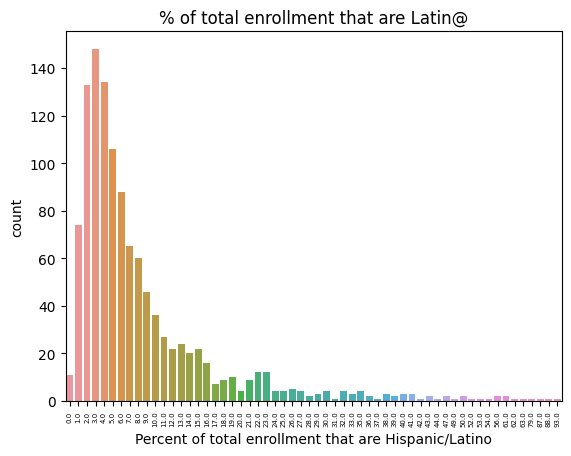

In [38]:
# Check univariate distributions and explore categorical variable(s)
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(x=df['Percent of total enrollment that are Hispanic/Latino'])
ax.set_title('% of total enrollment that are Latin@')
ax.tick_params(axis='x', rotation=90, labelsize=5)

plt.show()

Text(0, 0.5, '# of schools')

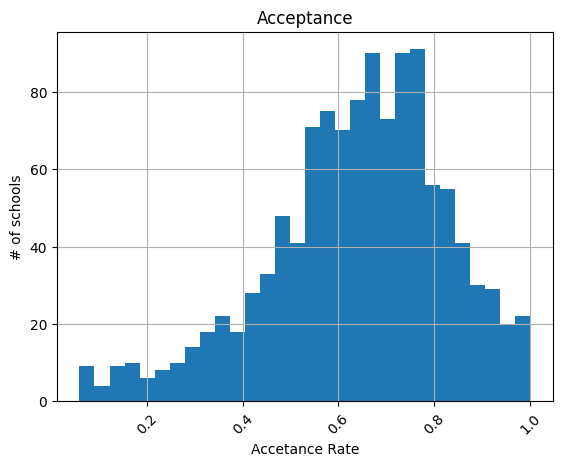

In [39]:
#histogram
ax = df['Acceptance'].hist(bins = 30)
ax.tick_params(axis='x', rotation = 45)
ax.ticklabel_format(style='plain')
ax.set_title('Acceptance')

plt.xlabel('Accetance Rate')
plt.ylabel('# of schools')

#Identified outliers.

In [40]:
stats= df.describe()
print(stats)

        Acceptance   Yield Rate   TotalSAT25   TotalSAT75  \
count  1169.000000  1169.000000  1169.000000  1169.000000   
mean      0.638494     0.322438   951.011976  1166.436270   
std       0.186480     0.138684   139.194219   139.789248   
min       0.060000     0.060000   630.000000   800.000000   
25%       0.540000     0.220000   860.000000  1070.000000   
50%       0.660000     0.300000   930.000000  1150.000000   
75%       0.770000     0.400000  1020.000000  1248.000000   
max       1.000000     0.910000  1490.000000  1600.000000   

       Percent of total enrollment that are American Indian or Alaska Native  \
count                                        1169.000000                       
mean                                            0.467066                       
std                                             1.511084                       
min                                             0.000000                       
25%                                             0.

###Analysis on % of Women enrolled + Black Students

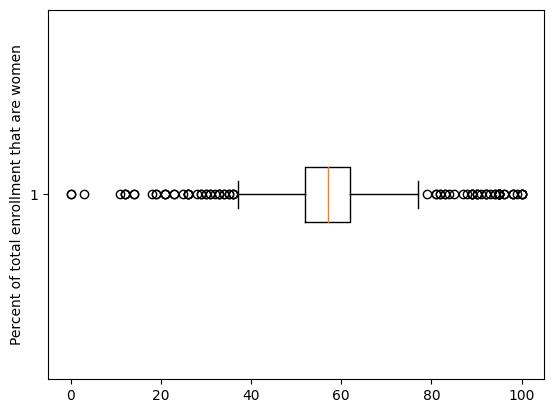

In [41]:
# making the boxplot horizontal
fig, ax = plt.subplots()
data = df["Percent of total enrollment that are women"]
ax.boxplot(data, vert = False);
ax.set_ylabel("Percent of total enrollment that are women");

###Schools were 90% of enrollments are women

In [42]:
df.loc[df['Percent of total enrollment that are women'] > 90]

,Name,Region,Urbanization,Degree,Historically Black College or University,Acceptance,Yield Rate,TotalSAT25,TotalSAT75,Percent of total enrollment that are American Indian or Alaska Native,Percent of total enrollment that are Asian,Percent of total enrollment that are Black or African American,Percent of total enrollment that are Hispanic/Latino,Percent of total enrollment that are Native Hawaiian or Other Pacific Islander,Percent of total enrollment that are White,Percent of total enrollment that are Nonresident Alien,Percent of total enrollment that are women
14,Judson College,South,Rural,Baccalaureate Colleges,No,0.74,0.34,1050.0,1240.0,0.0,1.0,14.0,1.0,0.0,80.0,1.0,95.0
112,Mills College,West,City,Master's Colleges and Universities,No,0.68,0.17,1040.0,1250.0,1.0,10.0,8.0,18.0,1.0,48.0,2.0,92.0
114,Mount St Mary's College,West,City,Master's Colleges and Universities,No,0.74,0.33,840.0,1030.0,0.0,15.0,8.0,53.0,1.0,14.0,1.0,91.0
132,Scripps College,West,Suburb,Baccalaureate Colleges,No,0.36,0.32,1280.0,1453.0,0.0,17.0,3.0,8.0,0.0,50.0,4.0,99.0
264,Spelman College,South,City,Baccalaureate Colleges,Yes,0.38,0.23,930.0,1110.0,0.0,0.0,85.0,0.0,0.0,0.0,1.0,100.0
270,Wesleyan College,South,City,Baccalaureate Colleges,No,0.43,0.35,880.0,1130.0,0.0,1.0,33.0,4.0,0.0,38.0,19.0,95.0
373,Saint Mary-of-the-Woods College,Midwest,Rural,Baccalaureate Colleges,No,0.98,0.20,780.0,1020.0,1.0,1.0,4.0,1.0,0.0,81.0,2.0,95.0
374,Saint Mary's College,Midwest,Suburb,Baccalaureate Colleges,No,0.86,0.33,990.0,1210.0,0.0,1.0,1.0,12.0,0.0,77.0,2.0,100.0
525,Bay Path College,Northeast,Suburb,Baccalaureate Colleges,No,0.58,0.26,840.0,1090.0,0.0,2.0,10.0,12.0,0.0,62.0,0.0,96.0
563,Simmons College,Northeast,City,Master's Colleges and Universities,No,0.49,0.16,1040.0,1250.0,0.0,5.0,6.0,5.0,0.0,70.0,2.0,92.0


In [43]:
df.loc[df['Percent of total enrollment that are Black or African American'] > 99]

,Name,Region,Urbanization,Degree,Historically Black College or University,Acceptance,Yield Rate,TotalSAT25,TotalSAT75,Percent of total enrollment that are American Indian or Alaska Native,Percent of total enrollment that are Asian,Percent of total enrollment that are Black or African American,Percent of total enrollment that are Hispanic/Latino,Percent of total enrollment that are Native Hawaiian or Other Pacific Islander,Percent of total enrollment that are White,Percent of total enrollment that are Nonresident Alien,Percent of total enrollment that are women
1236,Lane College,South,City,Baccalaureate Colleges,Yes,0.49,0.18,640.0,1040.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,48.0


# Part II

#Correlation heatmap

Identifying any moderate or strong correlations between your target and your features and/or between one feature and another using a correlation heatmap.
1. Target is Acceptance rate. Medium correlation between accetance rate and SAT scores.
2. High correlation (.65) between % of white students and % of black students
3. Medium correlation between SAT scores and black students enrollment

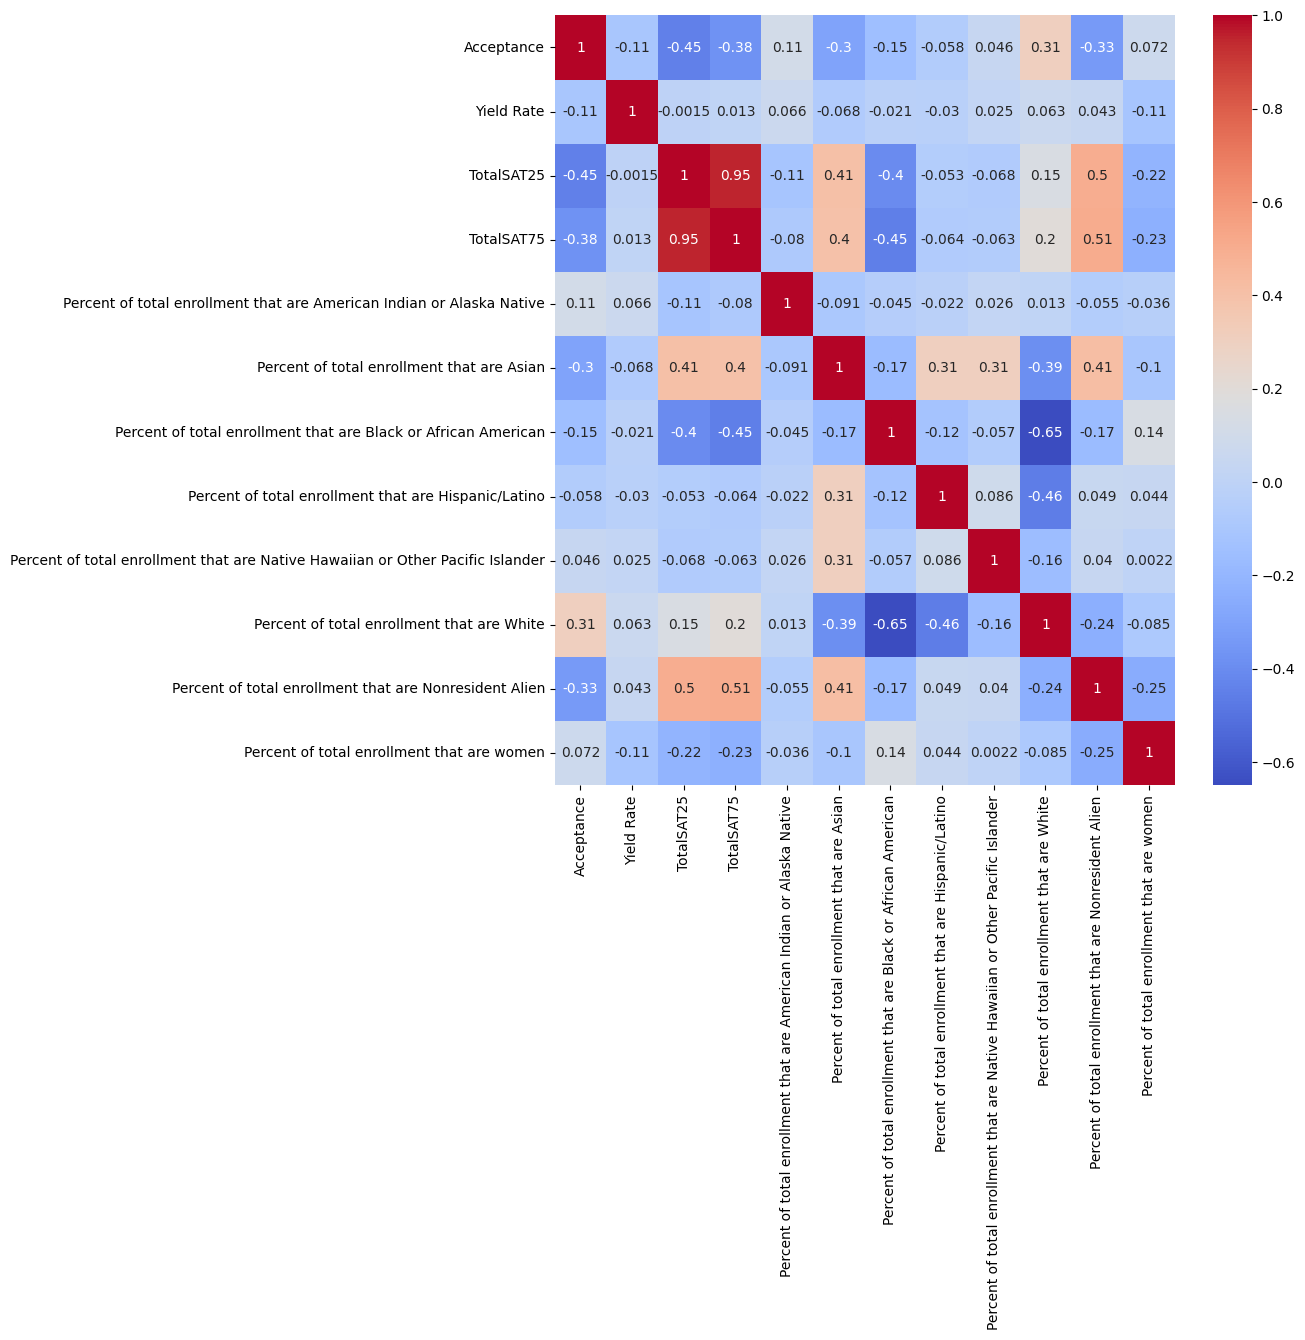

In [44]:
# Get correlations
corr = df.corr(numeric_only = True)
corr.round(2)

# Create a fig, ax with a figsize argument
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, cmap = 'coolwarm', annot = True, ax=ax, annot_kws={'fontsize': 10});

## Multivariate Visualization

Creating multivariate (multiple variables) exploratory visualizations to further understand your data and search for trends.

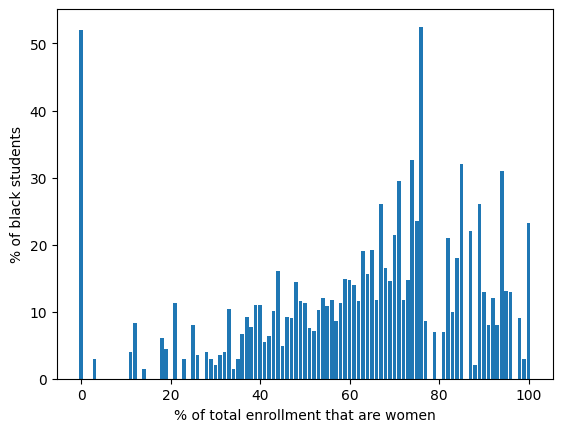

In [45]:
# Use groupby to calculate the average for each category
grad_SAT = df.groupby('Percent of total enrollment that are women')['Percent of total enrollment that are Black or African American'].mean()

# Plot the average of each as a bar
fig, ax = plt.subplots()
ax.bar(grad_SAT.index, grad_SAT.values);
ax.set_ylabel('% of black students')
ax.set_xlabel("% of total enrollment that are women");


## Analysis: 
- Schools with high % of women also tended to have high percentage of african american

<ipython-input-46-da301118ef67>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=5)


[Text(0, 0, '0.0'),
 Text(1, 0, '1.0'),
 Text(2, 0, '2.0'),
 Text(3, 0, '3.0'),
 Text(4, 0, '4.0'),
 Text(5, 0, '5.0'),
 Text(6, 0, '6.0'),
 Text(7, 0, '7.0'),
 Text(8, 0, '8.0'),
 Text(9, 0, '9.0'),
 Text(10, 0, '10.0'),
 Text(11, 0, '11.0'),
 Text(12, 0, '12.0'),
 Text(13, 0, '13.0'),
 Text(14, 0, '14.0'),
 Text(15, 0, '15.0'),
 Text(16, 0, '16.0'),
 Text(17, 0, '17.0'),
 Text(18, 0, '18.0'),
 Text(19, 0, '19.0'),
 Text(20, 0, '20.0'),
 Text(21, 0, '21.0'),
 Text(22, 0, '22.0'),
 Text(23, 0, '23.0'),
 Text(24, 0, '24.0'),
 Text(25, 0, '25.0'),
 Text(26, 0, '26.0'),
 Text(27, 0, '27.0'),
 Text(28, 0, '28.0'),
 Text(29, 0, '29.0'),
 Text(30, 0, '30.0'),
 Text(31, 0, '31.0'),
 Text(32, 0, '32.0'),
 Text(33, 0, '33.0'),
 Text(34, 0, '35.0'),
 Text(35, 0, '36.0'),
 Text(36, 0, '37.0'),
 Text(37, 0, '38.0'),
 Text(38, 0, '39.0'),
 Text(39, 0, '40.0'),
 Text(40, 0, '41.0'),
 Text(41, 0, '42.0'),
 Text(42, 0, '43.0'),
 Text(43, 0, '44.0'),
 Text(44, 0, '47.0'),
 Text(45, 0, '49.0'),
 Text(46

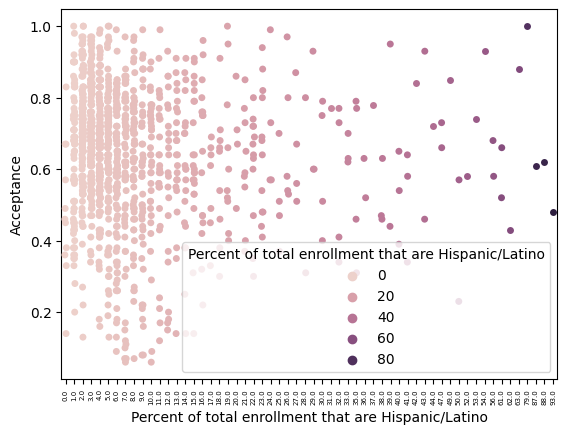

In [46]:
df['Percent of total enrollment that are Hispanic/Latino'] = df['Percent of total enrollment that are Hispanic/Latino'].replace(8.524804177545692, 8)
ax = sns.stripplot(data=df, x='Percent of total enrollment that are Hispanic/Latino', y='Acceptance',
                   hue='Percent of total enrollment that are Hispanic/Latino')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=5)

#Analysis:

- Most schools accepted less than 10% of hispanic admissions
- Schools with large % of hispanics accepted tended to have an acceptance rate above 40%


<ipython-input-47-b7d8a842c01d>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=5)


[Text(0, 0, '0.0'),
 Text(1, 0, '3.0'),
 Text(2, 0, '11.0'),
 Text(3, 0, '12.0'),
 Text(4, 0, '14.0'),
 Text(5, 0, '18.0'),
 Text(6, 0, '19.0'),
 Text(7, 0, '21.0'),
 Text(8, 0, '23.0'),
 Text(9, 0, '25.0'),
 Text(10, 0, '26.0'),
 Text(11, 0, '28.0'),
 Text(12, 0, '29.0'),
 Text(13, 0, '30.0'),
 Text(14, 0, '31.0'),
 Text(15, 0, '32.0'),
 Text(16, 0, '33.0'),
 Text(17, 0, '34.0'),
 Text(18, 0, '35.0'),
 Text(19, 0, '36.0'),
 Text(20, 0, '37.0'),
 Text(21, 0, '38.0'),
 Text(22, 0, '39.0'),
 Text(23, 0, '40.0'),
 Text(24, 0, '41.0'),
 Text(25, 0, '42.0'),
 Text(26, 0, '43.0'),
 Text(27, 0, '44.0'),
 Text(28, 0, '45.0'),
 Text(29, 0, '46.0'),
 Text(30, 0, '47.0'),
 Text(31, 0, '48.0'),
 Text(32, 0, '49.0'),
 Text(33, 0, '50.0'),
 Text(34, 0, '51.0'),
 Text(35, 0, '52.0'),
 Text(36, 0, '53.0'),
 Text(37, 0, '54.0'),
 Text(38, 0, '55.0'),
 Text(39, 0, '56.0'),
 Text(40, 0, '57.0'),
 Text(41, 0, '58.0'),
 Text(42, 0, '59.0'),
 Text(43, 0, '60.0'),
 Text(44, 0, '61.0'),
 Text(45, 0, '62.0'),


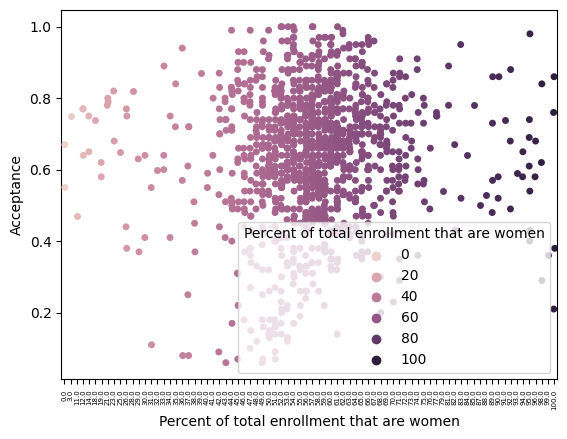

In [47]:
df['Percent of total enrollment that are women'] = df['Percent of total enrollment that are women'].replace(57.911227154047, 57)
ax = sns.stripplot(data=df, x='Percent of total enrollment that are women', y='Acceptance',
                   hue='Percent of total enrollment that are women')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=5)

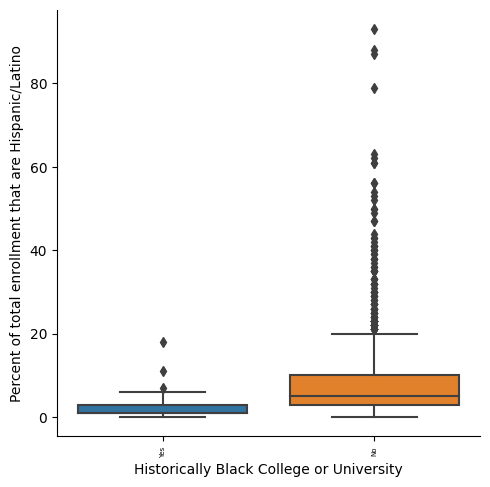

In [48]:
g = sns.catplot(data=df, x='Historically Black College or University', y='Percent of total enrollment that are Hispanic/Latino',hue='Historically Black College or University',

                kind='box', dodge=False)

g.set_xticklabels(rotation=90, fontsize=5)

###Analysis:
- Historically black universities have a lower % of hispanic students

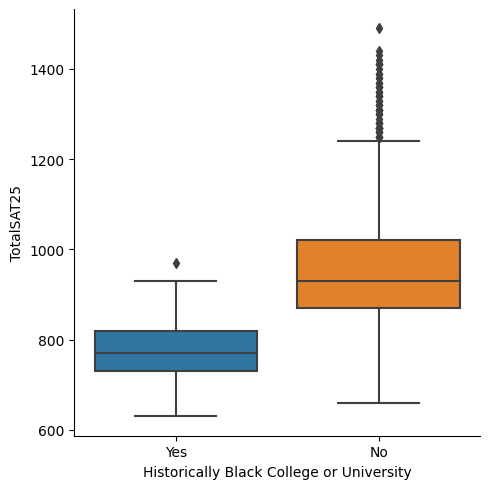

In [49]:
# Using catplot to make a box plot
g = sns.catplot(data=df, x='Historically Black College or University', y='TotalSAT25',
                   hue='Historically Black College or University',
                kind='box', dodge=False)

###Analysis:
- Historically black schools have a lower average in SATs than non-HBCU for the 25th percentile of SATs

Text(0.5, 1.0, 'SAT scores by % of women enrolled')

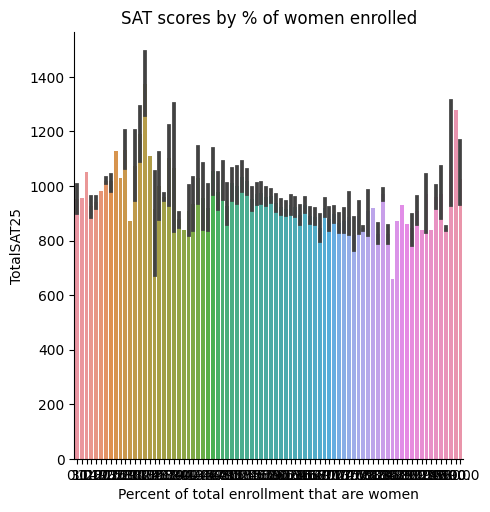

In [50]:

g = sns.catplot(data=df, x='Percent of total enrollment that are women', y='TotalSAT25',
                   hue='Percent of total enrollment that are women',
                kind='bar', dodge=False)
plt.title('SAT scores by % of women enrolled')

Text(0.5, 1.0, 'SAT scores by % of hispanics enrolled')

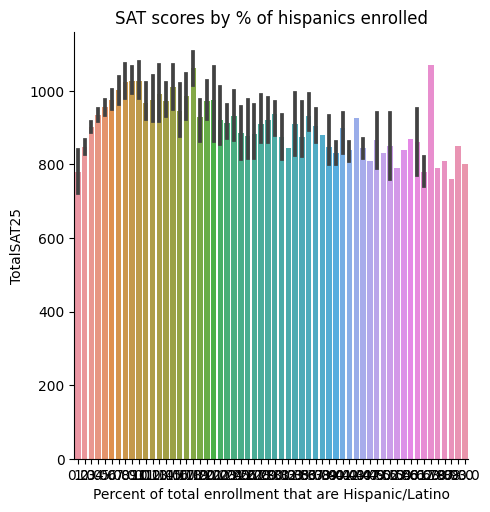

In [51]:
g = sns.catplot(data=df, x='Percent of total enrollment that are Hispanic/Latino', y='TotalSAT25',
                   hue='Percent of total enrollment that are Hispanic/Latino',
                kind='bar', dodge=False)
plt.title('SAT scores by % of hispanics enrolled')

# Analysis 

- Schools with lower % of hispanics have higher SATs scores

Text(0.5, 1.0, 'SATs IN HBCUs compared to non-HBCUs')

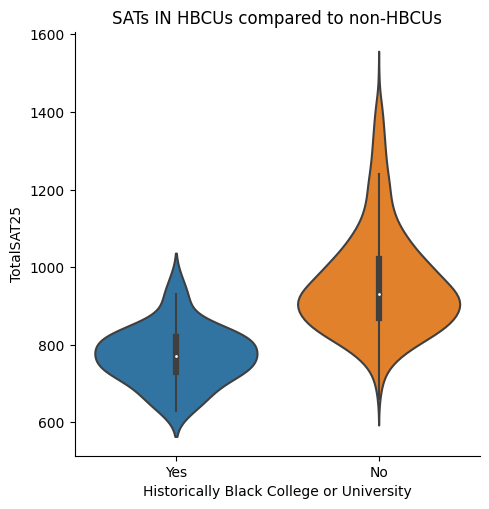

In [52]:
g = sns.catplot(data=df, x='Historically Black College or University', y='TotalSAT25',
                   hue='Historically Black College or University',
                kind='violin', dodge=False)
plt.title('SATs IN HBCUs compared to non-HBCUs')

Text(0.5, 1.0, '# OF TOTAL STUDENTS ADMITTED IN HBCUs compared to non-HBCUs')

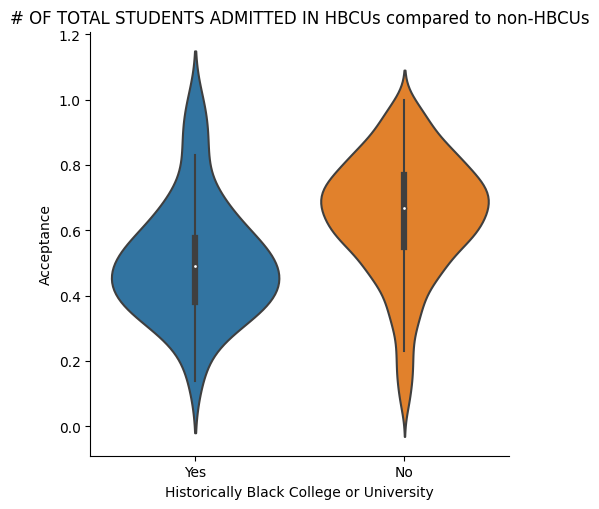

In [53]:
# Using catplot to make a violin plot
g = sns.catplot(data=df, x='Historically Black College or University', y='Acceptance',
                   hue='Historically Black College or University',
                kind='violin', dodge=False)
plt.title('# OF TOTAL STUDENTS ADMITTED IN HBCUs compared to non-HBCUs')

## Visual 1: Hispanics enrolled by region

1. Schools in the west tend to have higher % of hispanics
2. Schools in the Midwest have the lowest % of hispanics

Text(0.5, 1.0, 'HISPANICS % ENROLLED BY REGION')

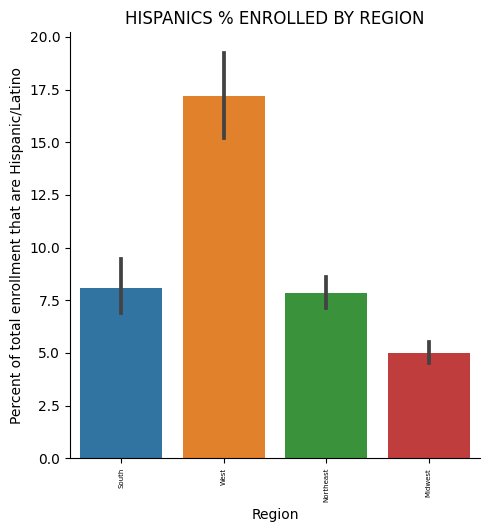

In [54]:
g = sns.catplot(data=df, x='Region', y='Percent of total enrollment that are Hispanic/Latino',hue='Region',
                kind='bar', dodge=False)
g.set_xticklabels(rotation=90, fontsize=5)
plt.title('HISPANICS % ENROLLED BY REGION')

##Visual 2: % OF WOMEN ADMITTED IN HBCUs

- The % of women is higher in historically black colleges than in non-historically black colleges. This is an interesting insight because colleges across the US are struggling to find enough men. This is even more pronounced in the African American community.
- I'd be interested to know what are the steps BHCU are taking to make sure they increase the numbers of males. I'm also interested in the scholarships offered to man compared to females

Text(0.5, 1.0, '% OF WOMEN ADMITTED IN HBCUs compared to non-HBCUs')

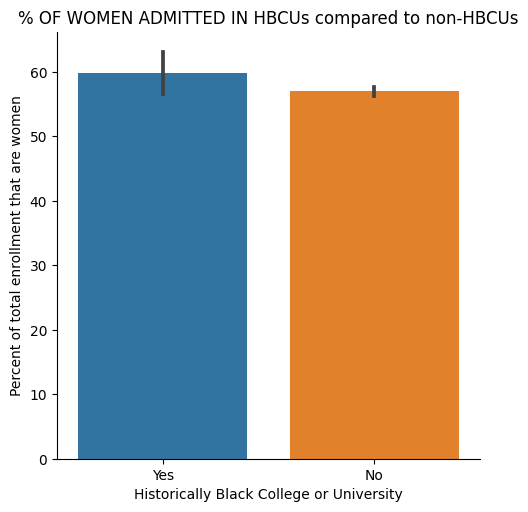

In [55]:
# Using catplot to make a box plot
g = sns.catplot(data=df, x='Historically Black College or University', y='Percent of total enrollment that are women',
                   hue='Historically Black College or University',
                kind='bar', dodge=False)
plt.title('% OF WOMEN ADMITTED IN HBCUs compared to non-HBCUs')